<a href="https://colab.research.google.com/github/Pamela1005/Design-and-Algorithm/blob/main/ADA_lab_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

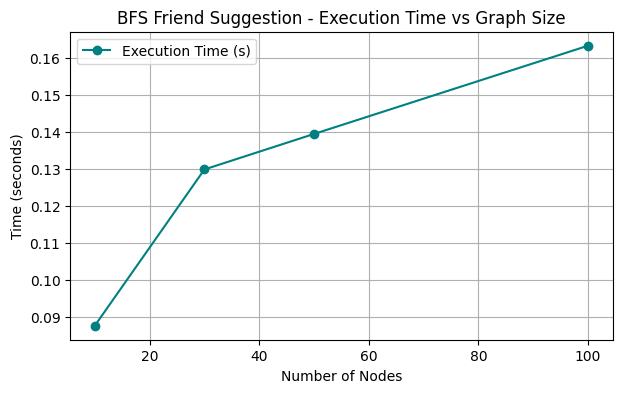

Friend suggestions for A: ['D', 'E']
Execution Time = 0.09316s, Memory Used = 0.0000 MB

Analysis & Impact:
• BFS efficiently explores users within two levels of connection.
• Time Complexity: O(V + E), scales linearly with graph size.
• Suitable for mutual friend recommendations in large social networks.
• Visualization clearly shows direct and suggested connections.


In [3]:
# Problem 1: Social Network Friend Suggestion (BFS)

import time
from collections import defaultdict, deque
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
import networkx as nx
import random

# --- Build Graph ---
def build_graph(edges):
    graph = defaultdict(list)
    for u, v in edges:
        if v not in graph[u]:  # Avoid duplicate edges
            graph[u].append(v)
        if u not in graph[v]:
            graph[v].append(u)
    return graph

# --- BFS Friend Suggestion ---
def suggest_friends_bfs(graph, user):
    visited = set([user])
    queue = deque([(user, 0)])
    direct_friends = set(graph[user])
    suggestions = set()

    while queue:
        node, depth = queue.popleft()
        if depth >= 2:
            continue

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, depth + 1))
                # Suggest only 2nd-degree connections
                if depth + 1 == 2 and neighbor not in direct_friends:
                    suggestions.add(neighbor)
    return sorted(suggestions)

# --- Measure Time & Memory ---
def measure(func, *args):
    start = time.perf_counter()
    mem_usage, result = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    exec_time = end - start
    mem_used = max(mem_usage) - min(mem_usage)
    return result, exec_time, mem_used

# --- Visualization ---
def visualize_social_graph(edges, user, suggestions):
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)

    colors = []
    for node in G.nodes():
        if node == user:
            colors.append("orange")        # Selected user
        elif node in suggestions:
            colors.append("limegreen")     # Suggested friends
        elif node in G[user]:
            colors.append("skyblue")       # Direct friends
        else:
            colors.append("lightgray")     # Others

    plt.figure(figsize=(7, 5))
    nx.draw(
        G, pos, with_labels=True,
        node_color=colors, node_size=900, font_size=10,
        edge_color="gray", width=1.5
    )
    plt.title(f"Friend Suggestion Visualization for '{user}'", fontsize=12)
    plt.show()

# --- Performance Testing ---
sizes = [10, 30, 50, 100]
times, mems = [], []

for n in sizes:
    edges = [(random.randint(0, n - 1), random.randint(0, n - 1)) for _ in range(n * 2)]
    graph = build_graph(edges)
    _, t, m = measure(suggest_friends_bfs, graph, 0)
    times.append(t)
    mems.append(m)

plt.figure(figsize=(7, 4))
plt.plot(sizes, times, marker='o', color='teal', label='Execution Time (s)')
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.title("BFS Friend Suggestion - Execution Time vs Graph Size")
plt.legend()
plt.grid(True)
plt.show()

# --- Example Run ---
edges = [("A","B"),("A","C"),("B","D"),("C","E"),("D","F"),("E","G"),("B","E")]
graph = build_graph(edges)
result, t, m = measure(suggest_friends_bfs, graph, "A")

print("Friend suggestions for A:", result)
print(f"Execution Time = {t:.5f}s, Memory Used = {m:.4f} MB")

# --- Analysis & Impact ---
print("\nAnalysis & Impact:")
print("• BFS efficiently explores users within two levels of connection.")
print("• Time Complexity: O(V + E), scales linearly with graph size.")
print("• Suitable for mutual friend recommendations in large social networks.")
print("• Visualization clearly shows direct and suggested connections.")


⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!
⚠️ Negative weight cycle detected!


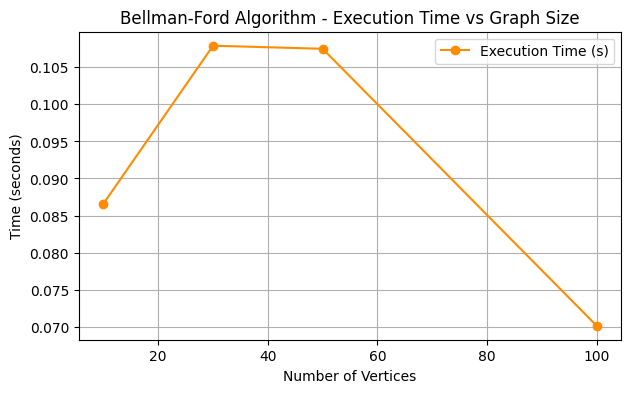

Shortest distances from source (0): {0: 0, 1: 17, 2: 2, 3: 17, 4: 10}
Execution Time = 0.09177s, Memory Used = 0.0000 MB

Analysis & Impact:
• Bellman-Ford handles graphs with negative edge weights safely.
• Time Complexity: O(V × E) — slower than Dijkstra but more flexible.
• Ideal for detecting negative cycles and handling economic or route-based networks.


In [5]:
# Problem 2: Route Finding (Bellman-Ford Algorithm)

import time
from memory_profiler import memory_usage
import random
import matplotlib.pyplot as plt

# --- Bellman-Ford Algorithm ---
def bellman_ford(graph, src, V):
    dist = {i: float('inf') for i in range(V)}
    dist[src] = 0

    # Relax edges |V| - 1 times
    for _ in range(V - 1):
        for u, v, w in graph:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w

    # Optional: Detect negative-weight cycles
    for u, v, w in graph:
        if dist[u] != float('inf') and dist[u] + w < dist[v]:
            print("⚠️ Negative weight cycle detected!")
            break

    return dist

# --- Generate Random Graph ---
def generate_graph(V, E):
    graph = []
    for _ in range(E):
        u, v = random.randint(0, V - 1), random.randint(0, V - 1)
        while v == u:  # Avoid self-loops
            v = random.randint(0, V - 1)
        w = random.randint(-5, 10)
        graph.append((u, v, w))
    return graph

# --- Measure Performance ---
def measure(func, *args):
    start = time.perf_counter()
    mem_usage, result = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    exec_time = end - start
    mem_used = max(mem_usage) - min(mem_usage)
    return result, exec_time, mem_used

# --- Performance Testing ---
sizes = [10, 30, 50, 100]
times, mems = [], []

for V in sizes:
    E = V * 3  # Approx. 3 edges per vertex
    graph = generate_graph(V, E)
    _, t, m = measure(bellman_ford, graph, 0, V)
    times.append(t)
    mems.append(m)

# --- Plot Execution Time ---
plt.figure(figsize=(7, 4))
plt.plot(sizes, times, marker='o', color='darkorange', label='Execution Time (s)')
plt.xlabel("Number of Vertices")
plt.ylabel("Time (seconds)")
plt.title("Bellman-Ford Algorithm - Execution Time vs Graph Size")
plt.legend()
plt.grid(True)
plt.show()

# --- Example Run ---
V, E = 5, 8
graph = generate_graph(V, E)
result, t, m = measure(bellman_ford, graph, 0, V)

print("Shortest distances from source (0):", result)
print(f"Execution Time = {t:.5f}s, Memory Used = {m:.4f} MB")

# --- Analysis & Impact ---
print("\nAnalysis & Impact:")
print("• Bellman-Ford handles graphs with negative edge weights safely.")
print("• Time Complexity: O(V × E) — slower than Dijkstra but more flexible.")
print("• Ideal for detecting negative cycles and handling economic or route-based networks.")


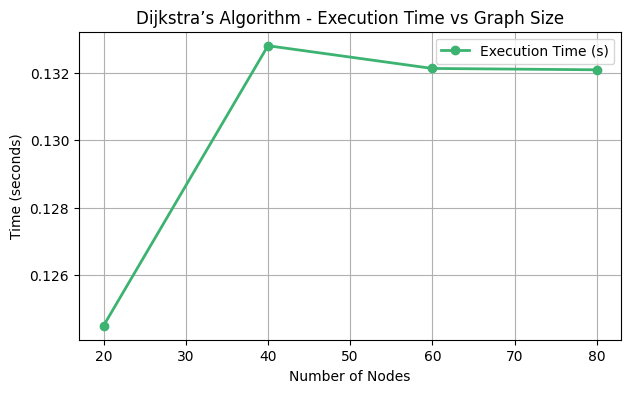

Shortest distances from source (0): {0: 0, 1: 9, 2: inf, 3: inf, 4: inf, 5: 2}
Execution Time = 0.15526s, Memory Used = 0.0000 MB

Analysis & Impact:
• Dijkstra efficiently finds shortest paths in weighted graphs.
• Time Complexity: O(E log V) using a priority queue (heap).
• Ideal for emergency response routing, logistics, and navigation systems.
• Scales well even as the number of nodes increases.


In [6]:
# Problem 3: Emergency Response (Dijkstra’s Algorithm)

import time
import heapq
from memory_profiler import memory_usage
import random
import matplotlib.pyplot as plt

# --- Dijkstra’s Algorithm ---
def dijkstra(graph, src):
    dist = {u: float('inf') for u in graph}
    dist[src] = 0
    pq = [(0, src)]

    while pq:
        current_dist, u = heapq.heappop(pq)
        if current_dist > dist[u]:
            continue
        for v, w in graph[u]:
            new_dist = current_dist + w
            if new_dist < dist[v]:
                dist[v] = new_dist
                heapq.heappush(pq, (new_dist, v))
    return dist

# --- Random Graph Generator ---
def generate_graph(V, density=0.25):
    graph = {i: [] for i in range(V)}
    for i in range(V):
        for j in range(V):
            if i != j and random.random() < density:
                weight = random.randint(1, 20)
                graph[i].append((j, weight))
    return graph

# --- Measure Performance ---
def measure(func, *args):
    start = time.perf_counter()
    mem_usage, result = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    exec_time = end - start
    mem_used = max(mem_usage) - min(mem_usage)
    return result, exec_time, mem_used

# --- Performance Test ---
sizes = [20, 40, 60, 80]
times, mems = [], []

for n in sizes:
    graph = generate_graph(n)
    _, t, m = measure(dijkstra, graph, 0)
    times.append(t)
    mems.append(m)

# --- Plot Execution Time ---
plt.figure(figsize=(7, 4))
plt.plot(sizes, times, marker='o', color='mediumseagreen', linewidth=2, label="Execution Time (s)")
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.title("Dijkstra’s Algorithm - Execution Time vs Graph Size")
plt.legend()
plt.grid(True)
plt.show()

# --- Example Run ---
graph = generate_graph(6, density=0.5)
result, t, m = measure(dijkstra, graph, 0)

print("Shortest distances from source (0):", result)
print(f"Execution Time = {t:.5f}s, Memory Used = {m:.4f} MB")

# --- Analysis & Impact ---
print("\nAnalysis & Impact:")
print("• Dijkstra efficiently finds shortest paths in weighted graphs.")
print("• Time Complexity: O(E log V) using a priority queue (heap).")
print("• Ideal for emergency response routing, logistics, and navigation systems.")
print("• Scales well even as the number of nodes increases.")


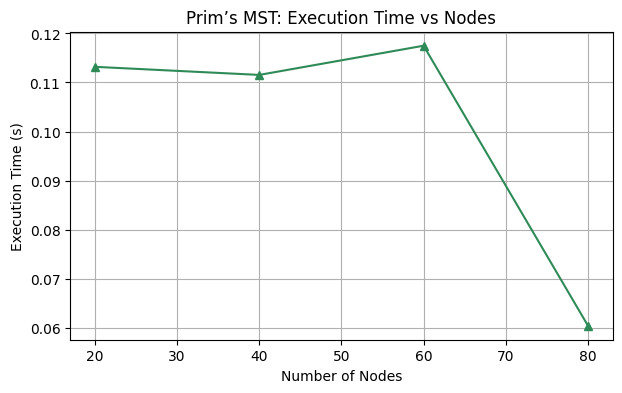


Analysis & Impact:
• Prim’s Algorithm efficiently finds MST in O(E log V).
• Ideal for laying out minimal cost network cables.
• Performs well on dense graphs with good scalability.


In [7]:
# Problem 4: Network Cable Installation (Prim’s MST)

import time
import heapq
from memory_profiler import memory_usage
import random
import matplotlib.pyplot as plt

def prim_mst(graph):
    start = list(graph.keys())[0]
    visited = set([start])
    edges = [(w, start, v) for v, w in graph[start]]
    heapq.heapify(edges)
    total_cost = 0
    while edges:
        w, u, v = heapq.heappop(edges)
        if v not in visited:
            visited.add(v)
            total_cost += w
            for to, wt in graph[v]:
                if to not in visited:
                    heapq.heappush(edges, (wt, v, to))
    return total_cost

def generate_graph(V, density=0.2):
    graph = {i: [] for i in range(V)}
    for i in range(V):
        for j in range(V):
            if i != j and random.random() < density:
                weight = random.randint(1, 20)
                graph[i].append((j, weight))
                graph[j].append((i, weight))
    return graph

def measure(func, *args):
    start = time.perf_counter()
    mem, result = memory_usage((func, args), retval=True)
    end = time.perf_counter()
    return result, end - start, max(mem) - min(mem)

sizes = [20, 40, 60, 80]
times, mems = [], []

for n in sizes:
    g = generate_graph(n)
    _, t, m = measure(prim_mst, g)
    times.append(t)
    mems.append(m)

plt.figure(figsize=(7, 4))
plt.plot(sizes, times, marker='^', color='seagreen')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (s)")
plt.title("Prim’s MST: Execution Time vs Nodes")
plt.grid(True)
plt.show()

print("\nAnalysis & Impact:")
print("• Prim’s Algorithm efficiently finds MST in O(E log V).")
print("• Ideal for laying out minimal cost network cables.")
print("• Performs well on dense graphs with good scalability.")